In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.utils import resample
from torch.optim import Adam

In [2]:
class RedMulticapa(nn.Module):
    def __init__(self, input_size, hidden1, hidden2, hidden3, hidden4, hidden5, output_size):
        super(RedMulticapa, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden1)
        self.hidden2 = nn.Linear(hidden1, hidden2)
        self.hidden3 = nn.Linear(hidden2, hidden3)
        self.hidden4 = nn.Linear(hidden3, hidden4)
        self.hidden5 = nn.Linear(hidden4, hidden5)
        self.output = nn.Linear(hidden5, output_size)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()
        self.loss = nn.BCELoss()
        self.historial = []

    def feed_forward(self, X):
        x = self.hidden1(X)
        x = self.sigmoid(x)
        x = self.hidden2(x)
        x = self.sigmoid(x)
        x = self.hidden3(x)
        x = self.sigmoid(x)
        x = self.hidden4(x)
        x = self.sigmoid(x)
        x = self.hidden5(x)
        x = self.output(x)
        x = self.sigmoid(x)
        return x

    def back_propagate(self, X, Y):
        outputs = self.feed_forward(X)
        error = self.loss(outputs, Y)
        self.zero_grad()
        error.backward()

    def track_progress(self, error):
        self.historial.append(error.item())

    def train(self, train_X, train_Y, optimizer, ciclos=10000):
        for i in range(ciclos):
            self.back_propagate(train_X, train_Y)
            optimizer.step()
            outputs = self.feed_forward(train_X)
            error = self.loss(outputs, train_Y)
            self.track_progress(error)

    def confusion(self, test_X, test_Y):
        with torch.no_grad():
            predictions = self.feed_forward(test_X)
            for i in range(len(predictions)):
                if predictions[i] <= 0.5:
                    predictions[i] = 0
                else:
                    predictions[i] = 1

        num_classes = 2
        confusion_matrix_result = [[0, 0], [0, 0]]

        for i in range(len(test_Y)):
            true_label = test_Y[i]
            pred = predictions[i]

            if true_label == pred:
                if pred == 1:
                    confusion_matrix_result[0][0] += 1
                else:
                    confusion_matrix_result[1][1] += 1
            else:
                if true_label == 1:
                    confusion_matrix_result[1][0] += 1
                else:
                    confusion_matrix_result[0][1] += 1

        return confusion_matrix_result

In [3]:
# Leer el archivo CSV
df1 = pd.read_csv('df_sim.csv')
df2 = pd.read_csv('df_sim2.csv')
df3 = pd.read_csv('df_sim3.csv')
df4 = pd.read_csv('df_sim4.csv')
df5 = pd.read_csv('df_sim5.csv')
df6 = pd.read_csv('df_sim6.csv')
df7 = pd.read_csv('df_sim7.csv')
df8 = pd.read_csv('df_sim8.csv')
df9 = pd.read_csv('df_sim9.csv')
df10 = pd.read_csv('df_sim10.csv')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10], ignore_index=True)
df = df.drop('HIVtreat', axis=1)

print(df)


       sex    age level of education  ever married  HIV acquisition  \
0        1  21-22    None or primary             1                0   
1        1  21-22              F3-F4             0                0   
2        1  21-22    None or primary             0                1   
3        1     18    None or primary             0                0   
4        1     18              F1-F2             0                0   
...    ...    ...                ...           ...              ...   
46715    2  19-20              F3-F4             1                0   
46716    2  19-20              F3-F4             1                0   
46717    2     18              F3-F4             0                1   
46718    2  19-20              F1-F2             0                0   
46719    2     18              F3-F4             0                1   

       HIV-testing self-efficacy  Condom self-efficacy  \
0                              1                     1   
1                              

In [4]:
# 'sex' a one-hot
sex_columna = df[['sex']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
sex_one_hot = encoder.fit_transform(sex_columna)
# Convertir la matriz de one-hot en un DataFrame
sex_one_hot_df = pd.DataFrame(sex_one_hot.toarray(), columns=encoder.get_feature_names_out(['sex']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df, sex_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['sex'], axis=1, inplace=True)

# 'age' a one-hot
age_columna = df[['age']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
age_one_hot = encoder.fit_transform(age_columna)
# Convertir la matriz de one-hot en un DataFrame
age_one_hot_df = pd.DataFrame(age_one_hot.toarray(), columns=encoder.get_feature_names_out(['age']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df_one_hot, age_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['age'], axis=1, inplace=True)

# 'level of education' a one-hot
level_of_education_columna = df[['level of education']]
# Crear un codificador OneHotEncoder
encoder = OneHotEncoder()
# Ajustar el codificador a los datos y transformar la columna
level_of_education_one_hot = encoder.fit_transform(level_of_education_columna)
# Convertir la matriz de one-hot en un DataFrame
level_of_education_one_hot_df = pd.DataFrame(level_of_education_one_hot.toarray(), columns=encoder.get_feature_names_out(['level of education']))
# Concatenar el DataFrame original con el DataFrame de one-hot
df_one_hot = pd.concat([df_one_hot, level_of_education_one_hot_df], axis=1)
# Imprimir el DataFrame resultante
df_one_hot.drop(['level of education'], axis=1, inplace=True)
print(df_one_hot)

       ever married  HIV acquisition  HIV-testing self-efficacy  \
0                 1                0                          1   
1                 0                0                          1   
2                 0                1                          1   
3                 0                0                          0   
4                 0                0                          1   
...             ...              ...                        ...   
46715             1                0                          1   
46716             1                0                          1   
46717             0                1                          1   
46718             0                0                          1   
46719             0                1                          1   

       Condom self-efficacy  Control around sexual partners  \
0                         1                               0   
1                         1                               0   
2     

In [5]:
# Supongamos que tu DataFrame en one-hot se llama df_one_hot y la columna de la clase se llama 'clase'
X = df_one_hot.drop('HSV-2 infection', axis=1)  # Características (variables independientes)
y = df_one_hot['HSV-2 infection']  # Variable objetivo (clase)

# Dividir el conjunto de datos en entrenamiento y prueba manteniendo la proporción de clases
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]

# Imprimir las formas de los conjuntos de entrenamiento y prueba
print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)

Forma de X_train: (37376, 26)
Forma de X_test: (9344, 26)
Forma de y_train: (37376,)
Forma de y_test: (9344,)


In [6]:
# Concatenar X_train e y_train para facilitar el remuestreo
train_data = pd.concat([X_train, Y_train], axis=1)

# Separar los datos de cada clase
clase_positiva = train_data[train_data['HSV-2 infection'] == 1]
clase_negativa = train_data[train_data['HSV-2 infection'] == 0]

# Igualar el número de ejemplos para cada clase en el conjunto de entrenamiento
n_muestras = int(min(len(clase_positiva)*(6/4), len(clase_negativa)))
clase_positiva_muestreada = resample(clase_positiva, replace=False, n_samples=len(clase_positiva), random_state=42)
clase_negativa_muestreada = resample(clase_negativa, replace=False, n_samples=n_muestras, random_state=42)

# Concatenar los datos de las dos clases muestreadas
train_data_balanceado = pd.concat([clase_positiva_muestreada, clase_negativa_muestreada])

# Separar características y etiquetas nuevamente
X_train_balanceado = train_data_balanceado.drop('HSV-2 infection', axis=1)
Y_train_balanceado = train_data_balanceado['HSV-2 infection']

# Encontrar los índices de los ejemplos que no se usaron en el conjunto de entrenamiento balanceado
indices_no_balanceados = train_data.index.difference(train_data_balanceado.index)

# Pasar los ejemplos restantes al conjunto de prueba
X_test_sin = np.copy(X_test)
Y_test_sin = np.copy(Y_test)
X_test = X_test.append(X_train.loc[indices_no_balanceados])
Y_test = Y_test.append(Y_train.loc[indices_no_balanceados])

# Eliminar los ejemplos restantes del conjunto de entrenamiento original
X_train = X_train.drop(indices_no_balanceados)
Y_train = Y_train.drop(indices_no_balanceados)

# Imprimir las formas de los conjuntos de entrenamiento y prueba balanceados
print("Forma de X_train_balanceado:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train_balanceado:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)
print(X_test_sin.shape)

Forma de X_train_balanceado: (6280, 26)
Forma de X_test: (40440, 26)
Forma de y_train_balanceado: (6280,)
Forma de y_test: (40440,)
(9344, 26)


In [7]:
'''
max_samples = max(pd.Series(Y_train).value_counts())

print(np.unique(Y_train))

for label in np.unique(Y_train):
    label_indices = np.where(Y_train == label)[0]
    while len(label_indices) < max_samples:
        label_indices = np.concatenate((label_indices, np.random.choice(label_indices, max_samples - len(label_indices))))
    np.random.shuffle(label_indices)
    if label == np.unique(Y_train)[0]:
        train_indices = label_indices
    else:
        train_indices = np.concatenate((train_indices, label_indices))

X_train = X_train.iloc[train_indices]
Y_train = Y_train.iloc[train_indices]

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_train:", Y_train.shape)
print("Forma de y_test:", Y_test.shape)
'''


'\nmax_samples = max(pd.Series(Y_train).value_counts())\n\nprint(np.unique(Y_train))\n\nfor label in np.unique(Y_train):\n    label_indices = np.where(Y_train == label)[0]\n    while len(label_indices) < max_samples:\n        label_indices = np.concatenate((label_indices, np.random.choice(label_indices, max_samples - len(label_indices))))\n    np.random.shuffle(label_indices)\n    if label == np.unique(Y_train)[0]:\n        train_indices = label_indices\n    else:\n        train_indices = np.concatenate((train_indices, label_indices))\n\nX_train = X_train.iloc[train_indices]\nY_train = Y_train.iloc[train_indices]\n\nprint("Forma de X_train:", X_train.shape)\nprint("Forma de X_test:", X_test.shape)\nprint("Forma de y_train:", Y_train.shape)\nprint("Forma de y_test:", Y_test.shape)\n'

In [8]:
# Convertir los DataFrames de pandas a matrices numpy
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [9]:
# Convertir las matrices numpy a tensores de PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
Y_test = torch.tensor(Y_test, dtype=torch.float32)

# Convertir arrays numpy a tensores PyTorch
X_test_sin = torch.tensor(X_test_sin, dtype=torch.float32)
Y_test_sin = torch.tensor(Y_test_sin, dtype=torch.float32)

# Clonar y desvincular si es necesario (esto es opcional y depende del uso)
X_test_sin = X_test_sin.clone().detach().float()
Y_test_sin = Y_test_sin.clone().detach().float()

In [10]:
input_size = 26
hidden1 = 70
hidden2 = 140
hidden3= 280
hidden4= 140
hidden5 = 70
output_size = 1

'''
input_size = 26
hidden1 = 52
hidden2 = 60  
hidden3= 70
hidden4= 40
hidden5 = 26
output_size = 2
'''

modelo2 = RedMulticapa(input_size, hidden1, hidden2, hidden3, hidden4, hidden5, output_size)
#modelo2.load_state_dict(torch.load('modelo_entrenado_BCE.pth'))
print(modelo2)
optimizer = Adam(modelo2.parameters(), lr=0.001)
modelo2.train(X_train, Y_train.unsqueeze(1), optimizer, ciclos=40000)

RedMulticapa(
  (hidden1): Linear(in_features=26, out_features=70, bias=True)
  (hidden2): Linear(in_features=70, out_features=140, bias=True)
  (hidden3): Linear(in_features=140, out_features=280, bias=True)
  (hidden4): Linear(in_features=280, out_features=140, bias=True)
  (hidden5): Linear(in_features=140, out_features=70, bias=True)
  (output): Linear(in_features=70, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (tanh): Tanh()
  (loss): BCELoss()
)


In [50]:
optimizer = Adam(modelo2.parameters(), lr=0.00001)
modelo2.train(X_train, Y_train.unsqueeze(1), optimizer, ciclos=10000)

In [12]:
#optimizer = Adam(modelo2.parameters())
#modelo2.train(X_train, Y_train.unsqueeze(1), optimizer, ciclos=5000)

In [138]:
Confusion = np.copy(np.array(modelo2.confusion(X_train, Y_train)))
print("VP Entrenamiento: ", Confusion[0][0])
print("VN Entrenamiento: ", Confusion[1][1])
print("FP Entrenamiento: ", Confusion[0][1])
print("FN Entrenamiento: ", Confusion[1][0])

Confusion = np.copy(np.array(modelo2.confusion(X_test, Y_test)))
print("VP Prueba: ", Confusion[0][0])
print("VN Prueba: ", Confusion[1][1])
print("FP Prueba: ", Confusion[0][1])
print("FN Prueba: ", Confusion[1][0])

Confusion = np.copy(np.array(modelo2.confusion(X_test_sin, Y_test_sin)))
print("VP Prueba sin extras: ", Confusion[0][0])
print("VN Prueba sin extras: ", Confusion[1][1])
print("FP Prueba sin extras: ", Confusion[0][1])
print("FN Prueba sin extras: ", Confusion[1][0])

print("Matriz de confusión con Adam")

VP Entrenamiento:  2329
VN Entrenamiento:  3588
FP Entrenamiento:  180
FN Entrenamiento:  183
VP Prueba:  451
VN Prueba:  33482
FP Prueba:  6330
FN Prueba:  177
VP Prueba sin extras:  451
VN Prueba sin extras:  7323
FP Prueba sin extras:  1393
FN Prueba sin extras:  177
Matriz de confusión con Adam


In [147]:
input_size = 26
hidden1 = 70
hidden2 = 140
hidden3= 280
hidden4= 140
hidden5 = 70
output_size = 1

modelo2_reales = RedMulticapa(input_size, hidden1, hidden2, hidden3, hidden4, hidden5, output_size)
modelo2_reales.load_state_dict(torch.load('modelo_entrenado_BCE.pth'))
print(modelo2_reales)

RedMulticapa(
  (hidden1): Linear(in_features=26, out_features=70, bias=True)
  (hidden2): Linear(in_features=70, out_features=140, bias=True)
  (hidden3): Linear(in_features=140, out_features=280, bias=True)
  (hidden4): Linear(in_features=280, out_features=140, bias=True)
  (hidden5): Linear(in_features=140, out_features=70, bias=True)
  (output): Linear(in_features=70, out_features=1, bias=True)
  (sigmoid): Sigmoid()
  (tanh): Tanh()
  (loss): BCELoss()
)


In [148]:
Confusion = np.copy(np.array(modelo2_reales.confusion(X_train, Y_train)))
print("VP Entrenamiento: ", Confusion[0][0])
print("VN Entrenamiento: ", Confusion[1][1])
print("FP Entrenamiento: ", Confusion[0][1])
print("FN Entrenamiento: ", Confusion[1][0])

Confusion = np.copy(np.array(modelo2_reales.confusion(X_test, Y_test)))
print("VP Prueba: ", Confusion[0][0])
print("VN Prueba: ", Confusion[1][1])
print("FP Prueba: ", Confusion[0][1])
print("FN Prueba: ", Confusion[1][0])

Confusion = np.copy(np.array(modelo2_reales.confusion(X_test_sin, Y_test_sin)))
print("VP Prueba sin extras: ", Confusion[0][0])
print("VN Prueba sin extras: ", Confusion[1][1])
print("FP Prueba sin extras: ", Confusion[0][1])
print("FN Prueba sin extras: ", Confusion[1][0])

print("Matriz de confusión con Adam")

VP Entrenamiento:  1375
VN Entrenamiento:  2088
FP Entrenamiento:  1680
FN Entrenamiento:  1137
VP Prueba:  338
VN Prueba:  22352
FP Prueba:  17460
FN Prueba:  290
VP Prueba sin extras:  338
VN Prueba sin extras:  4854
FP Prueba sin extras:  3862
FN Prueba sin extras:  290
Matriz de confusión con Adam


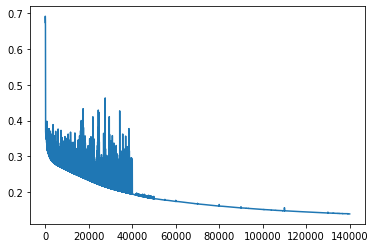

In [52]:
plt.plot(modelo2.historial)

In [54]:
prob = modelo2.feed_forward(X_test)

infectados = 0

for i in prob:
    if np.random.uniform(0, 1) <= i:
        infectados = infectados + 1
    
print(infectados)

7085


In [55]:
torch.save(modelo2.state_dict(), 'modelo_entrenado_BCE_sim.pth')
np.save('historialmodelo2_sim.npy', modelo2.historial)

In [62]:
columnas_categoricas = df_one_hot.columns
print(columnas_categoricas)

Index(['ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
       'Condom self-efficacy', 'Control around sexual partners',
       'Safe sex and condoms', 'Ever had sex', 'Two or more lifetime partners',
       'Sexual debut 17 or younger', 'Two or more partners in last 12m',
       'Did not use condom at last sex', 'Sought treatment for STD symptoms',
       'Genital discharge prevalence', 'Genital warts or sores prevalence',
       'Rights within marriage', 'Reported past or current pregnancy',
       'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection',
       'sex_1', 'sex_2', 'age_18', 'age_19-20', 'age_21-22',
       'level of education_F1-F2', 'level of education_F3-F4',
       'level of education_None or primary'],
      dtype='object')


In [63]:
# Lista de columnas categóricas
print(columnas_categoricas)


Index(['ever married', 'HIV acquisition', 'HIV-testing self-efficacy',
       'Condom self-efficacy', 'Control around sexual partners',
       'Safe sex and condoms', 'Ever had sex', 'Two or more lifetime partners',
       'Sexual debut 17 or younger', 'Two or more partners in last 12m',
       'Did not use condom at last sex', 'Sought treatment for STD symptoms',
       'Genital discharge prevalence', 'Genital warts or sores prevalence',
       'Rights within marriage', 'Reported past or current pregnancy',
       'Prevalence of any symptom of STD', 'HIV infection', 'HSV-2 infection',
       'sex_1', 'sex_2', 'age_18', 'age_19-20', 'age_21-22',
       'level of education_F1-F2', 'level of education_F3-F4',
       'level of education_None or primary'],
      dtype='object')


In [129]:
# Lista de valores binarios
#valores_binarios = [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0]
# Crear un tensor aleatorio de 0 y 1 con la longitud especificada
tensor = torch.randint(0, 2, (26,), dtype=torch.float32)

# Mostrar el tensor
print("Tensor aleatorio de PyTorch:")
print(tensor)

# Convertir la lista a un tensor de PyTorch
tensor = torch.tensor(tensor, dtype=torch.float32)

Tensor aleatorio de PyTorch:
tensor([0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
        1., 0., 1., 0., 0., 0., 1., 1.])


C:\Users\david\AppData\Local\Temp/ipykernel_19240/3487982867.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  tensor = torch.tensor(tensor, dtype=torch.float32)


In [133]:
prob = modelo2.feed_forward(X_test)

print(prob)

tensor([[0.0301],
        [1.0000],
        [0.0000],
        ...,
        [0.0000],
        [0.0000],
        [0.1996]], grad_fn=<SigmoidBackward0>)
